In [1]:
!pip install numpy scikit-learn torch

In [2]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score,
    mean_squared_error, mean_absolute_error
)

import torch
import torch.nn as nn

In [3]:
# 1 = positive class, 0 = negative class

y_true = np.array([1, 0, 1, 1, 0, 0, 1, 0])
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0])  # model predictions (labels)


In [4]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, pos_label=1)
rec = recall_score(y_true, y_pred, pos_label=1)
f1 = f1_score(y_true, y_pred, pos_label=1)

# Compute FPR explicitly from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
fpr = fp / (fp + tn)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("False Positive Rate (FPR):", fpr)



Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1-score: 0.75
False Positive Rate (FPR): 0.25


In [8]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)


Confusion matrix:
 [[3 1]
 [1 3]]


In [9]:
y_true = np.array([1, 0, 1, 1, 0, 0, 1, 0])
# model's probability that the class is 1
y_scores = np.array([0.9, 0.2, 0.8, 0.4, 0.3, 0.7, 0.95, 0.1])


In [10]:
fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label=1)

print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)


FPR: [0.   0.   0.   0.25 0.25 1.  ]
TPR: [0.   0.25 0.75 0.75 1.   1.  ]
Thresholds: [ inf 0.95 0.8  0.7  0.4  0.1 ]


In [11]:
auc_value = roc_auc_score(y_true, y_scores)
print("AUC:", auc_value)


AUC: 0.9375


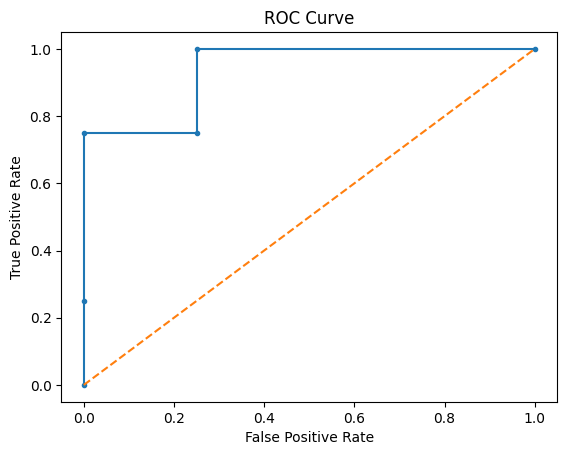

In [12]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [13]:
y_true_reg = np.array([3.0, 5.0, 2.5, 7.0])
y_pred_reg = np.array([2.5, 5.0, 4.0, 6.0])

mse = mean_squared_error(y_true_reg, y_pred_reg)
mae = mean_absolute_error(y_true_reg, y_pred_reg)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)


MSE: 0.875
MAE: 0.75
RMSE: 0.9354143466934853


In [14]:
y_true_reg_t = torch.tensor([3.0, 5.0, 2.5, 7.0])
y_pred_reg_t = torch.tensor([2.5, 5.0, 4.0, 6.0])

mse_loss_fn = nn.MSELoss()
l1_loss_fn = nn.L1Loss()

mse_torch = mse_loss_fn(y_pred_reg_t, y_true_reg_t)
mae_torch = l1_loss_fn(y_pred_reg_t, y_true_reg_t)
rmse_torch = torch.sqrt(mse_torch)

print("PyTorch MSE:", mse_torch.item())
print("PyTorch MAE:", mae_torch.item())
print("PyTorch RMSE:", rmse_torch.item())


PyTorch MSE: 0.875
PyTorch MAE: 0.75
PyTorch RMSE: 0.9354143738746643


In [15]:
# Suppose we have 3 classes (0, 1, 2) and a batch of 3 samples
logits = torch.tensor([
    [2.0, 1.0, 0.1],  # sample 1 raw scores
    [0.5, 2.5, 0.3],  # sample 2
    [0.1, 0.2, 2.0]   # sample 3
], dtype=torch.float32)

targets = torch.tensor([0, 1, 2])  # true class indices

ce_loss_fn = nn.CrossEntropyLoss()
ce_loss = ce_loss_fn(logits, targets)

print("Cross-entropy loss (PyTorch):", ce_loss.item())


Cross-entropy loss (PyTorch): 0.3036051094532013


Exercises

#1.	Confusion matrix to performance metrics

A binary classifier (positive class = 1) produces the following confusion matrix:

![image.png](attachment:image.png)

Identify TP, TN, FP, FN
Compute accuracy, precision, recall, and F1-score for the positive class

In [16]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Define the confusion matrix values
# Format: [[TN, FP], [FN, TP]]
cm = np.array([[50, 10],
               [5, 35]])

# Step 2: Extract individual components
tn, fp, fn, tp = cm.ravel()

# Step 3: Compute metrics manually
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

# Step 4: Print results
print("Confusion Matrix:")
print(cm)
print("\nMetrics:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Confusion Matrix:
[[50 10]
 [ 5 35]]

Metrics:
True Positives (TP): 35
True Negatives (TN): 50
False Positives (FP): 10
False Negatives (FN): 5
Accuracy: 0.8500
Precision: 0.7778
Recall: 0.8750
F1-score: 0.8235


#2.	Accuracy vs AUC in Imbalanced Data
A dataset has 99% negatives and 1% positives.A classifier predicts class 0 for every instance.


What is its accuracy? What is its AUC? Why is AUC more informative here?


In [ ]:
# import pandas as pd
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# import matplotlib.pyplot as plt

# # Step 1: Read CSV file
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks (1)/week7/data (1).csv")

# # Step 2: Extract columns
# y_true = df["y_true"].values
# y_pred = df["y_pred"].values
# y_scores = df["y_score"].values

# # Step 3: Compute metrics
# accuracy = accuracy_score(y_true, y_pred)
# auc_value = roc_auc_score(y_true, y_scores)

# print("Accuracy:", accuracy)
# print("AUC:", auc_value)

# # Step 4: Plot ROC curve
# fpr, tpr, thresholds = roc_curve(y_true, y_scores)
# plt.plot(fpr, tpr, marker='.')
# plt.plot([0,1],[0,1],'--')  # random baseline
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve (Always Predict Negative)")
# plt.show()

Accuracy: 0.99
AUC: 0.5


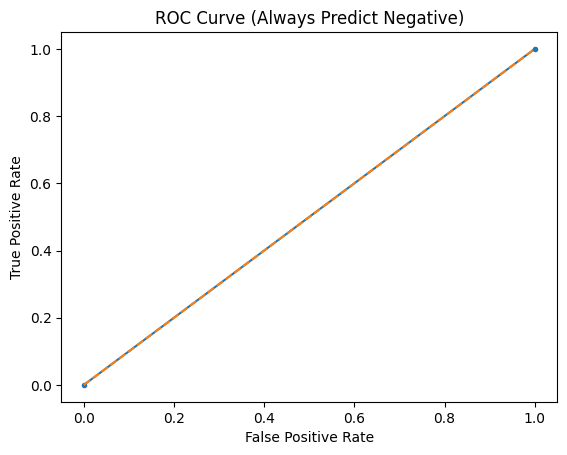

In [17]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Create dataset
# 99 negatives (0), 1 positive (1)
y_true = np.array([0]*99 + [1])  

# Step 2: Classifier predicts all negatives
y_pred = np.array([0]*100)

# Step 3: Compute accuracy
accuracy = accuracy_score(y_true, y_pred)

# Step 4: For AUC, we need scores (probabilities).
# Since the classifier always predicts 0, we can simulate scores = all zeros.
y_scores = np.array([0]*100)

auc_value = roc_auc_score(y_true, y_scores)

print("Accuracy:", accuracy)
print("AUC:", auc_value)

# Step 5: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.plot(fpr, tpr, marker='.')
plt.plot([0,1],[0,1],'--')  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Always Predict Negative)")
plt.show()

#3.	Precision–Recall Trade-off
You are building a classifier to detect a rare disease. If you lower the probability threshold for predicting “positive”, describe what happens to the following:

What happens to precision? What happens to recall? Which is more important in medical screening?


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import precision_score, recall_score
# import matplotlib.pyplot as plt

# # Step 1: Read CSV file
# df = pd.read_csv("data.csv")

# # Step 2: Extract columns
# y_true = df["y_true"].values
# y_scores = df["y_score"].values

# # Step 3: Define thresholds to test
# thresholds = [0.9, 0.7, 0.5, 0.3, 0.1]

# precisions = []
# recalls = []

# # Step 4: Compute precision and recall at each threshold
# for t in thresholds:
#     y_pred = (y_scores >= t).astype(int)
#     precisions.append(precision_score(y_true, y_pred, zero_division=0))
#     recalls.append(recall_score(y_true, y_pred, zero_division=0))
#     print(f"Threshold {t}: Precision={precisions[-1]:.3f}, Recall={recalls[-1]:.3f}")

# # Step 5: Plot Precision-Recall curve
# plt.plot(recalls, precisions, marker='o')
# for i, t in enumerate(thresholds):
#     plt.text(recalls[i], precisions[i], f"{thresholds[i]}")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Precision–Recall Trade-off")
# plt.grid(True)
# plt.show()

Threshold 0.9: Precision=1.000, Recall=0.200
Threshold 0.7: Precision=1.000, Recall=0.700
Threshold 0.5: Precision=1.000, Recall=1.000
Threshold 0.3: Precision=0.238, Recall=1.000
Threshold 0.1: Precision=0.133, Recall=1.000


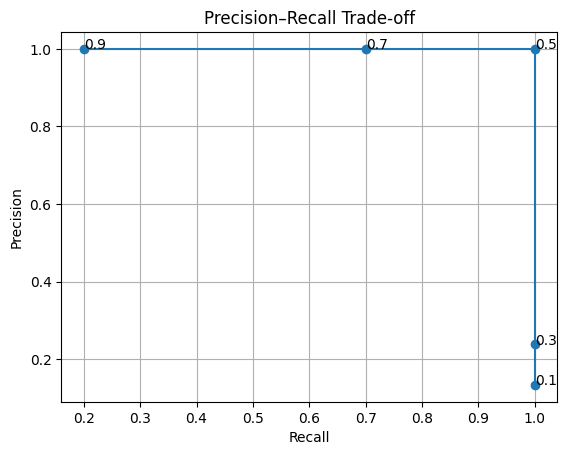

In [18]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

# Simulate dataset: 100 samples, 10 positives (rare disease), 90 negatives
y_true = np.array([1]*10 + [0]*90)

# Simulated model scores (probabilities of being positive)
np.random.seed(42)
y_scores = np.concatenate([
    np.random.uniform(0.6, 1.0, 10),   # positives get higher scores
    np.random.uniform(0.0, 0.5, 90)    # negatives get lower scores
])

# Thresholds to test
thresholds = [0.9, 0.7, 0.5, 0.3, 0.1]

precisions = []
recalls = []

for t in thresholds:
    y_pred = (y_scores >= t).astype(int)
    precisions.append(precision_score(y_true, y_pred))
    recalls.append(recall_score(y_true, y_pred))
    print(f"Threshold {t}: Precision={precisions[-1]:.3f}, Recall={recalls[-1]:.3f}")

# Plot Precision-Recall curve
plt.plot(recalls, precisions, marker='o')
for i, t in enumerate(thresholds):
    plt.text(recalls[i], precisions[i], f"{thresholds[i]}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Trade-off")
plt.grid(True)
plt.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# import pandas as pd
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks (1)/week7/data.csv")

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_recall_curve, average_precision_score

# # Step 1: Read CSV file with true labels and predicted scores
# # Format: y_true,y_score
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks (1)/week7/data.csv")
# y_true = df["y_true"].values
# y_scores = df["y_score"].values

# # Step 2: Compute precision-recall pairs for all thresholds
# precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)

# # Step 3: Compute average precision (summary metric)
# avg_precision = average_precision_score(y_true, y_scores)

# # Step 4: Plot Precision-Recall curve
# plt.plot(recalls, precisions, marker='.')
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title(f"Precision–Recall Curve (AP = {avg_precision:.3f})")
# plt.grid(True)
# plt.show()

# # Step 5: Inspect thresholds
# for i, t in enumerate(thresholds[:10]):  # show first 10 thresholds
#     print(f"Threshold {t:.3f}: Precision={precisions[i]:.3f}, Recall={recalls[i]:.3f}")


#4.	Regression Metrics (MSE vs MAE vs RMSE)
Two regression models have similar MAE but different MSE. Model A has a much higher MSE than Model B.

What does the higher MSE suggest about Model A’s errors?

When might MAE be preferred over MSE?


In [ ]:
# import pandas as pd
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import numpy as np

# # Step 1: Read CSV file
# df = pd.read_csv("predictions.csv")

# # Step 2: Extract columns
# y_true = df["y_true"].values
# y_pred_A = df["y_pred_A"].values
# y_pred_B = df["y_pred_B"].values

# # Step 3: Compute metrics for Model A
# mae_A = mean_absolute_error(y_true, y_pred_A)
# mse_A = mean_squared_error(y_true, y_pred_A)
# rmse_A = np.sqrt(mse_A)

# # Step 4: Compute metrics for Model B
# mae_B = mean_absolute_error(y_true, y_pred_B)
# mse_B = mean_squared_error(y_true, y_pred_B)
# rmse_B = np.sqrt(mse_B)

# # Step 5: Print results
# print("Model A -> MAE:", mae_A, "MSE:", mse_A, "RMSE:", rmse_A)
# print("Model B -> MAE:", mae_B, "MSE:", mse_B, "RMSE:", rmse_B)

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# True values
y_true = np.array([10, 20, 30, 40, 50])

# Model A predictions: mostly close, but one huge outlier
y_pred_A = np.array([12, 19, 29, 41, 100])  # last prediction way off

# Model B predictions: all errors are moderate
y_pred_B = np.array([12, 19, 29, 41, 55])   # consistent small errors

# Compute metrics
mae_A = mean_absolute_error(y_true, y_pred_A)
mse_A = mean_squared_error(y_true, y_pred_A)
rmse_A = np.sqrt(mse_A)

mae_B = mean_absolute_error(y_true, y_pred_B)
mse_B = mean_squared_error(y_true, y_pred_B)
rmse_B = np.sqrt(mse_B)

print("Model A -> MAE:", mae_A, "MSE:", mse_A, "RMSE:", rmse_A)
print("Model B -> MAE:", mae_B, "MSE:", mse_B, "RMSE:", rmse_B)

Model A -> MAE: 11.0 MSE: 501.4 RMSE: 22.391962843841984
Model B -> MAE: 2.0 MSE: 6.4 RMSE: 2.5298221281347035


#5.	Cross-Entropy Behaviour

For a sample in a classification problem:

True class = 2

Predicted probabilities = [0.9, 0.09, 0.01]



What is the cross-entropy loss for this sample?

Is the loss large or small?

What happens to cross-entropy if the model becomes more confident but predicts the wrong class?


In [6]:
import numpy as np

# True class index
true_class = 2

# Predicted probabilities
y_pred = np.array([0.9, 0.09, 0.01])

# Cross-entropy loss = -log(probability of true class)
cross_entropy_loss = -np.log(y_pred[true_class])

print("Cross-entropy loss:", cross_entropy_loss)

Cross-entropy loss: 4.605170185988091


True class probability: 0.90000 -> Cross-entropy loss: 0.105
True class probability: 0.09000 -> Cross-entropy loss: 2.408
True class probability: 0.01000 -> Cross-entropy loss: 4.605


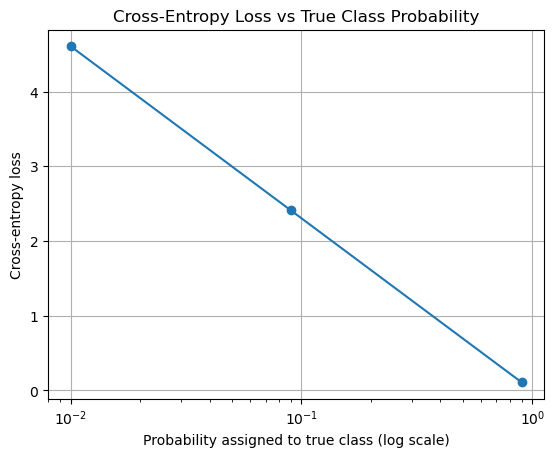

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# True class index
true_class = 2

# Different predicted probabilities for the true class
probs_true = np.array([0.9, 0.09, 0.01])

# Compute cross-entropy loss = -log(p_true)
losses = -np.log(probs_true)

# Print results
for p, l in zip(probs_true, losses):
    print(f"True class probability: {p:.5f} -> Cross-entropy loss: {l:.3f}")

# Plot the relationship
plt.plot(probs_true, losses, marker='o')
plt.xscale('log')  # log scale to show small probabilities clearly
plt.xlabel("Probability assigned to true class (log scale)")
plt.ylabel("Cross-entropy loss")
plt.title("Cross-Entropy Loss vs True Class Probability")
plt.grid(True)
plt.show()